Import the necessary libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The problem with the above data is it has categorical lablels which is unsuitable for machine learning algorithms. You need to convert them to unique numerical values for machine learning. Lets do it with pandas in python First we will import the csv into pandas

In [45]:
df = pd.read_csv('car.csv')

Use head, info and describe methods

In [46]:
df.head()

,buying,maintainance,doors,persons,lug_boot,saftey,classs
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying          1728 non-null object
maintainance    1728 non-null object
doors           1728 non-null object
persons         1728 non-null object
lug_boot        1728 non-null object
saftey          1728 non-null object
classs          1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.describe()

,buying,maintainance,doors,persons,lug_boot,saftey,classs
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,big,high,unacc
freq,432,432,432,576,576,576,1210


In [6]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [11]:
df.groupby('saftey').count()

,buying,maintainance,doors,persons,lug_boot,classs
saftey,,,,,,
high,576,576,576,576,576,576
low,576,576,576,576,576,576
med,576,576,576,576,576,576


In [18]:
df.isnull().sum()

buying          0
maintainance    0
doors           0
persons         0
lug_boot        0
saftey          0
classs          0
dtype: int64

In [34]:
df['classs'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

Rearrange values in the dataframe so that it is easier to work with data. Here we conver string values to int.

Note that the scores are in ascending order, i.e. 1 is the minimum score

In [49]:
df.replace({'buying': {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}, 
           'maintainance': {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1},
            'doors': {'5more': 6},
            'persons': {'more': 5},
           'lug_boot': {'big': 3, 'med': 2, 'small': 1},
            'saftey': {'high': 3, 'med': 2, 'low': 1},
            'classs': {'unacc': 1, 'acc': 2, 'vgood': 3, 'good': 4}
           }, inplace=True)

In [50]:
df.head()

,buying,maintainance,doors,persons,lug_boot,saftey,classs
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


Perform basic data visualization

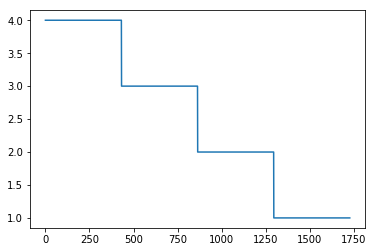

In [66]:
plt.plot(df['buying'])

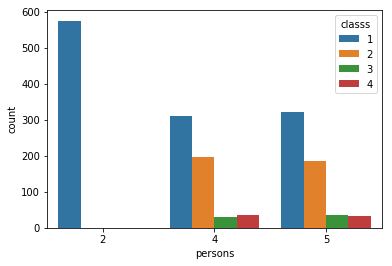

In [71]:
sns.countplot(x='persons',data=df,hue='classs')

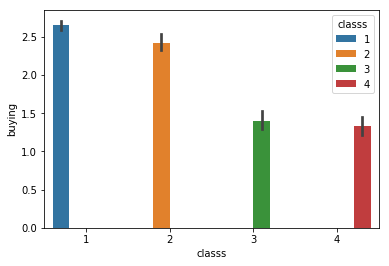

In [78]:
sns.barplot("classs","buying",  data=df, hue="classs")  

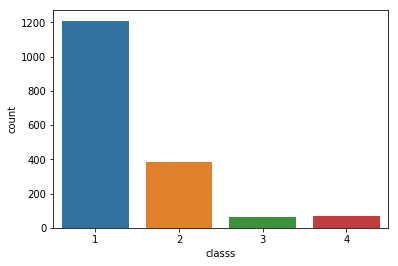

In [79]:
sns.countplot(df.classs)

Now its time to go the the machine learning section. We will predict the class of the vehicle based on the other input values. 

We will use Random Forest Classifier to predict the class of the vehicle.

In [80]:
from sklearn.cross_validation import train_test_split

Use train_test_split method to split data into testing and training sets.

In [82]:
X = df.drop('classs',axis=1)
y = df['classs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfc = RandomForestClassifier(n_estimators=500)

In [86]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Predict the class of vehicle for the X_test data.

In [87]:
predictions = rfc.predict(X_test)

Print classification report and confusion matrix

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       1.00      0.97      0.99       374
          2       0.93      0.97      0.95       108
          3       0.94      0.94      0.94        16
          4       0.80      0.95      0.87        21

avg / total       0.97      0.97      0.97       519



In [90]:
print(confusion_matrix(y_test, predictions))

[[364   7   0   3]
 [  1 105   0   2]
 [  0   1  15   0]
 [  0   0   1  20]]


97%! That's a pretty good accuracy score!